📘 **Theory: Gradient Filters (High-Pass Filters)**

OpenCV provides three primary gradient filters:

| **Filter Type** | **Purpose**                            | **Function**                     |
|------------------|-----------------------------------------|----------------------------------|
| **Sobel**        | Edge detection with Gaussian smoothing | `cv.Sobel()`                     |
| **Scharr**       | Optimized Sobel (for small kernel)     | `cv.Sobel()` with `ksize=-1`     |
| **Laplacian**    | 2nd-order derivative for edge detection| `cv.Laplacian()`                 |


📌 **1. Sobel and Scharr Operators**

- **Sobel** = Gaussian Smoothing + Differentiation
- Detects gradients in the **X** or **Y** direction

### 🔧 Parameters:
- `dx`, `dy`: Derivative orders (e.g., `dx=1`, `dy=0` for X-gradient)
- `ksize`: Kernel size  
  - `ksize = -1` uses the **Scharr filter**  
  - Scharr gives **more accurate results** than a 3x3 Sobel filter


📌 **2. Laplacian Operator**

The **Laplacian** calculates the **second derivative** of the image:

$$
\text{Laplacian}(I) = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}
$$

- Combines **Sobel derivatives** in both directions
- Good for capturing **rapid intensity changes** (edges)


### 🧪 Example 1: Apply All Operators

(<Axes: title={'center': 'Sobel Y'}>,
 Text(0.5, 1.0, 'Sobel Y'),
 (-0.5, 249.5, 249.5, -0.5))

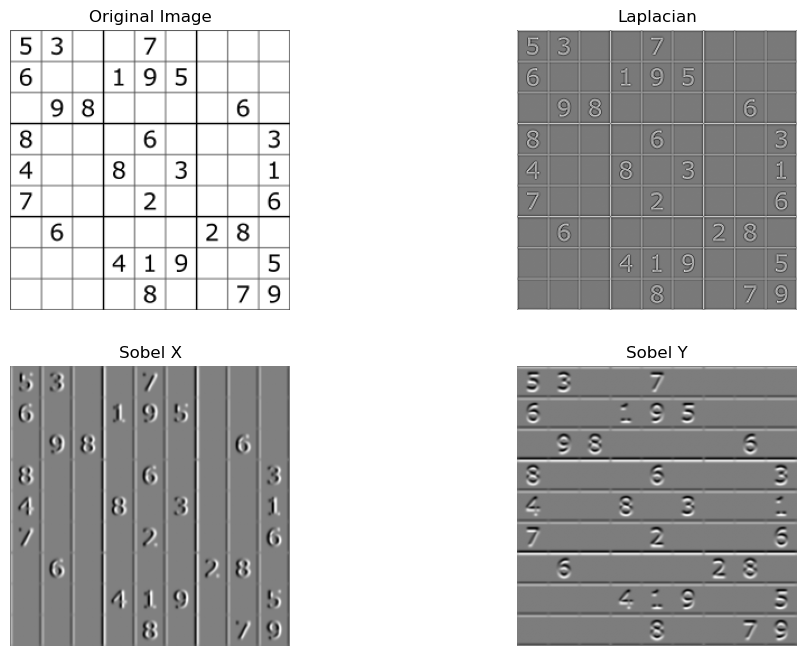

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load the image in grayscale
img = cv.imread('Image/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# Laplacian operator
laplacian = cv.Laplacian(img, cv.CV_64F)
# Sobel operator
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

# Visualize the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y'), plt.axis('off')

⚠️ **Important Note on Data Types**

When you use:
```python
cv.Sobel(img, cv.CV_8U, 1, 0)

✅ **Recommended Approach**

- Use `cv.CV_64F` or `cv.CV_16S` to **capture the full gradient range** (including negative values).
- Use `np.absolute()` to get the **absolute gradient**.
- Convert back to `uint8`

### 🧪 Example 2: Compare Output Data Types

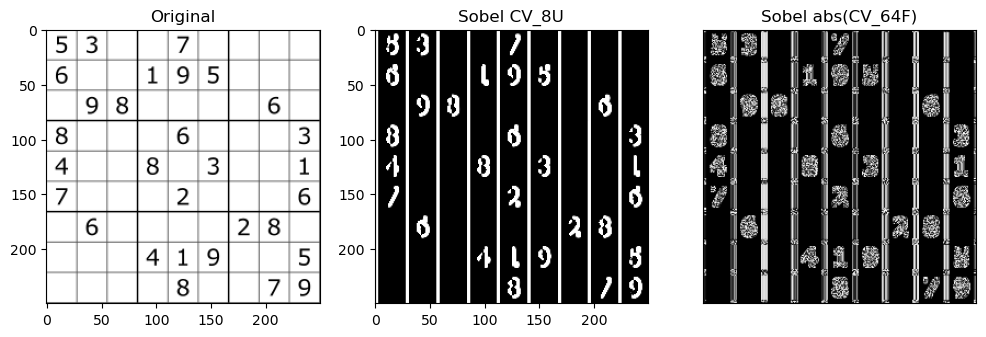

In [ ]:
img = cv.imread('Image/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# Method 1: Direct CV_8U (may lose negative edges)
sobelx8u = cv.Sobel(img, cv.CV_8U, 1, 0, ksize=5)

# Method 2: Use CV_64F → absolute → convert to uint8
sobelx64f = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
abs_sobel64f = np.absolute(sobelx64f) # Convert to absolute values
sobel_8u = np.uint8(abs_sobel64f) # Convert to uint8

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(sobelx8u, cmap='gray'), plt.title('Sobel CV_8U')
plt.subplot(1, 3, 3), plt.imshow(sobel_8u, cmap='gray'), plt.title('Sobel abs(CV_64F)')
plt.xticks([]), plt.yticks([])
plt.show()

🧾 **Summary Table**

| Filter    | Function            | Highlights                                      |
|-----------|---------------------|-------------------------------------------------|
| **Sobel**     | `cv.Sobel()`         | Gaussian smoothing + edge detection            |
| **Scharr**    | `cv.Sobel(ksize=-1)` | More accurate than Sobel for 3x3 kernels       |
| **Laplacian** | `cv.Laplacian()`     | Captures second-order changes                  |
